# Spectral Analysis

In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt

from linetools.spectra import io as lsio
from linetools.spectralline import AbsLine
from linetools.analysis import voigt as ltav

from astropy import units as u
from astropy import constants as const

from bokeh.io import output_notebook, show, output_file
from bokeh.layouts import column
from bokeh.plotting import figure
from bokeh.models import Range1d

output_notebook()

Loading BokehJS ...

In [2]:
%matplotlib inline

## Spectral Characteristics

In [3]:
### Resolution
### Dispersion/Sampling
### S/N

### Method to generate faux spectrum

In [4]:
def make_spec(line, sdict, off=2):
    """ Generate a line-profile given a line and spectral characteristics
    line is an AbsLine, e.g. Lya
    sdict is a dict containing the spectral characteristics
    off sets the region around the line for the spectrum
    """
    dispersion = line.wrest / sdict['R'] / sdict['sampling']
    wave = np.arange(line.wrest.value-off, line.wrest.value+off, dispersion.value)*u.AA
    # Generate Voigt profile
    spec = ltav.voigt_from_abslines(wave, [line], fwhm=sdict['sampling'])
    # S/N?
    if 'SN' in sdict.keys():
        spec = spec.add_noise(s2n=sdict['SN'])
    # Return
    return spec    

### Ly$\alpha$ line

In [5]:
lya = AbsLine(1215.6700*u.AA, z=0.)
lya.attrib['N'] = 10.**(13.6)/u.cm**2
lya.attrib['b'] = 30 * u.km/u.s
#lya.attrib['z'] = 0.

Loading abundances from Asplund2009
Abundances are relative by number on a logarithmic scale with H=12


/home/xavier/local/Python/linetools/linetools/lists/linelist.py:399: RuntimeWarning: divide by zero encountered in log10
  self._data['log(w*f)'] = np.log10(qm_strength)


### Nearly 'Perfect' Ly$\alpha$ line: R=200,000; no Noise

In [6]:
sdict = dict(R=200000, sampling=3)
perfect = make_spec(lya, sdict)
#perfect_line.plot()

### Echelle Resolution:  R=30,000

In [7]:
echelle_sdict = dict(R=30000, sampling=3)
echelle = make_spec(lya, echelle_sdict)

/home/xavier/local/Python/linetools/linetools/analysis/voigt.py:182: UserWarning: Using a sub-grid wavelength array because the input array is too coarse.
  warnings.warn('Using a sub-grid wavelength array because the input array is too coarse.')
/home/xavier/local/Python/linetools/linetools/analysis/voigt.py:183: UserWarning: Will return values rebinned to the input array.
  warnings.warn('Will return values rebinned to the input array.')


In [8]:
%matplotlib inline

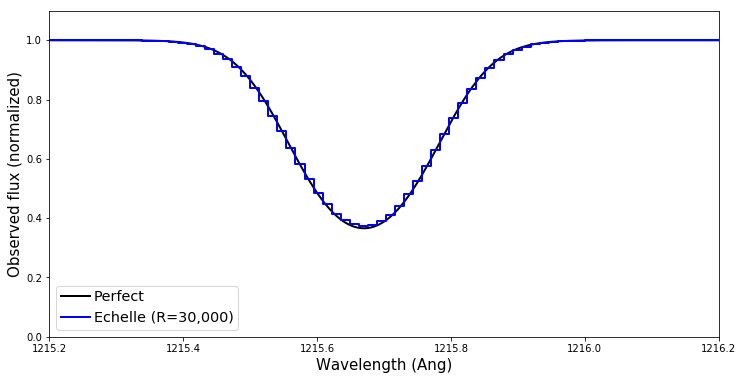

In [9]:
# Matplotlib plot
plt.figure(figsize=(12.0, 6.0))
plt.clf()
ax = plt.gca()
# Lines
lw=2
ax.plot(perfect.wavelength, perfect.flux, 'k', label='Perfect', linewidth=lw)
ax.plot(echelle.wavelength, echelle.flux, 'b', label='Echelle (R=30,000)', drawstyle='steps-mid',
       linewidth=lw)

# Axes
ax.set_xlabel("Wavelength (Ang)",fontsize=15)
ax.set_ylabel("Observed flux (normalized)",fontsize=15)
ax.set_xlim(1215.2, 1216.2)
ax.set_ylim(0.,1.1)

# Legend
legend = plt.legend(loc='lower left', scatterpoints=1, borderpad=0.3, 
        handletextpad=0.3, fontsize='x-large', numpoints=1)
plt.show()

### Echellette: R=8,000

In [10]:
ESI_sdict = dict(R=8000, sampling=3)
ESI = make_spec(lya, ESI_sdict)

/home/xavier/local/Python/linetools/linetools/analysis/voigt.py:182: UserWarning: Using a sub-grid wavelength array because the input array is too coarse.
  warnings.warn('Using a sub-grid wavelength array because the input array is too coarse.')
/home/xavier/local/Python/linetools/linetools/analysis/voigt.py:183: UserWarning: Will return values rebinned to the input array.
  warnings.warn('Will return values rebinned to the input array.')


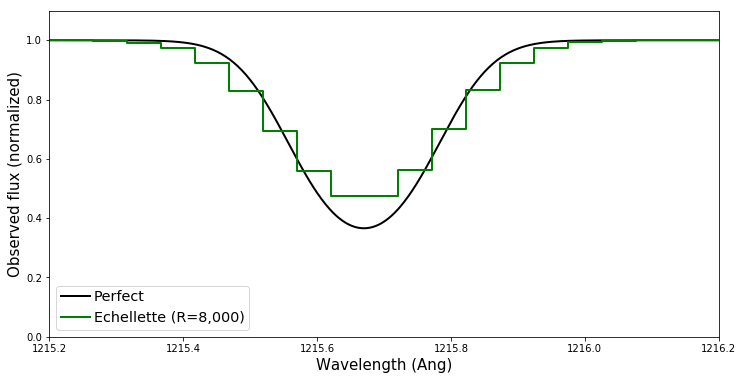

In [11]:
# Matplotlib plot
plt.figure(figsize=(12.0, 6.0))
plt.clf()
ax = plt.gca()
# Lines
lw=2
ax.plot(perfect.wavelength, perfect.flux, 'k', label='Perfect', linewidth=lw)
ax.plot(ESI.wavelength, ESI.flux, 'g', label='Echellette (R=8,000)', drawstyle='steps-mid',
       linewidth=lw)

# Axes
ax.set_xlabel("Wavelength (Ang)",fontsize=15)
ax.set_ylabel("Observed flux (normalized)",fontsize=15)
ax.set_xlim(1215.2, 1216.2)
ax.set_ylim(0.,1.1)
# Legend
legend = plt.legend(loc='lower left', scatterpoints=1, borderpad=0.3, 
        handletextpad=0.3, fontsize='x-large', numpoints=1)
plt.show()

### SDSS: R=2,000

In [12]:
SDSS_sdict = dict(R=2000, sampling=2)
sdss = make_spec(lya, SDSS_sdict)

/home/xavier/local/Python/linetools/linetools/analysis/voigt.py:182: UserWarning: Using a sub-grid wavelength array because the input array is too coarse.
  warnings.warn('Using a sub-grid wavelength array because the input array is too coarse.')
/home/xavier/local/Python/linetools/linetools/analysis/voigt.py:183: UserWarning: Will return values rebinned to the input array.
  warnings.warn('Will return values rebinned to the input array.')


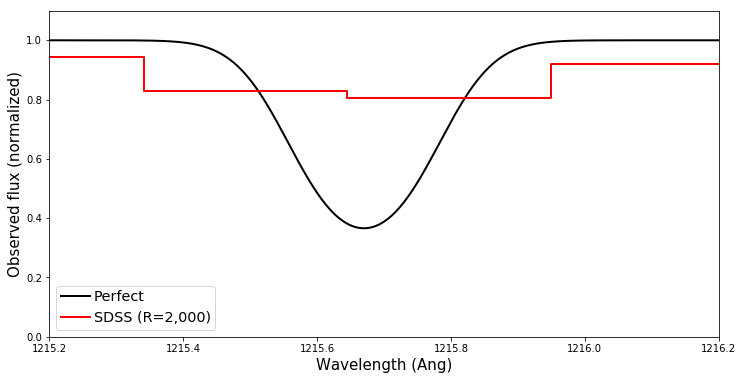

In [13]:
# Matplotlib plot
plt.figure(figsize=(12.0, 6.0))
plt.clf()
ax = plt.gca()
# Lines
lw=2
ax.plot(perfect.wavelength, perfect.flux, 'k', label='Perfect', linewidth=lw)
ax.plot(sdss.wavelength, sdss.flux, 'r', label='SDSS (R=2,000)', drawstyle='steps-mid',
       linewidth=lw)

# Axes
ax.set_xlabel("Wavelength (Ang)",fontsize=15)
ax.set_ylabel("Observed flux (normalized)",fontsize=15)
ax.set_xlim(1215.2, 1216.2)
ax.set_ylim(0.,1.1)
# Legend
legend = plt.legend(loc='lower left', scatterpoints=1, borderpad=0.3, 
        handletextpad=0.3, fontsize='x-large', numpoints=1)
plt.show()

### Noise

In [14]:
noise_sdict = dict(R=2000, sampling=3, SN=10)
noise = make_spec(lya, noise_sdict)

/home/xavier/local/Python/linetools/linetools/analysis/voigt.py:182: UserWarning: Using a sub-grid wavelength array because the input array is too coarse.
  warnings.warn('Using a sub-grid wavelength array because the input array is too coarse.')
/home/xavier/local/Python/linetools/linetools/analysis/voigt.py:183: UserWarning: Will return values rebinned to the input array.
  warnings.warn('Will return values rebinned to the input array.')


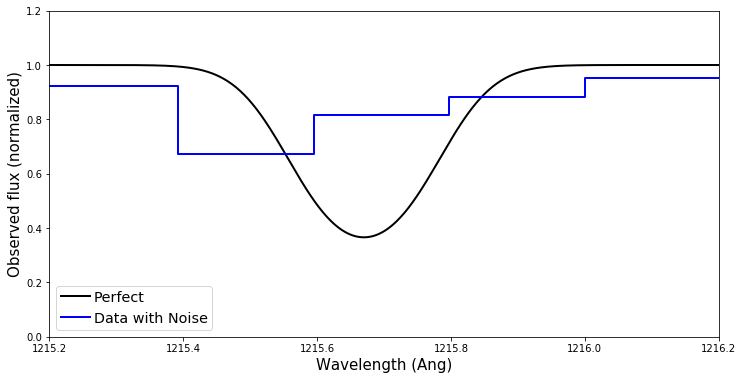

In [15]:
# Matplotlib plot
plt.figure(figsize=(12.0, 6.0))
plt.clf()
ax = plt.gca()
# Lines
lw=2
ax.plot(perfect.wavelength, perfect.flux, 'k', label='Perfect', linewidth=lw)
ax.plot(noise.wavelength, noise.flux, 'b', label='Data with Noise', drawstyle='steps-mid',
       linewidth=lw)

# Axes
ax.set_xlabel("Wavelength (Ang)",fontsize=15)
ax.set_ylabel("Observed flux (normalized)",fontsize=15)
ax.set_xlim(1215.2, 1216.2)
ax.set_ylim(0.,1.2)

# Legend
legend = plt.legend(loc='lower left', scatterpoints=1, borderpad=0.3, 
        handletextpad=0.3, fontsize='x-large', numpoints=1)
plt.show()

----

## Continuum Fitting

In [16]:
# import (reset here to turn off inline plotting)
from linetools.spectra import io as lsio

### Fit

In [17]:
#spec.fit_continuum()  -- Must be called outside of the Notebook
# e.g. lt_continuumfit ../Data/FJ0812+32_xF.fits
# Written to FJ0812+32_xF_c.fits  (in Data)

### Load spectrum (including continuum)

In [18]:
spec = lsio.readspec('../Data/FJ0812+32_xF_c.fits')
spec.co_is_set

True

### Plot without continuum

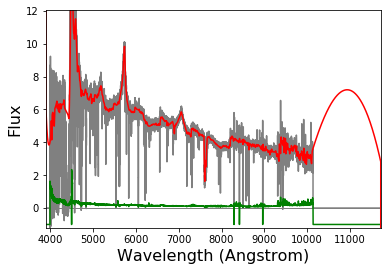

In [19]:
spec.plot()

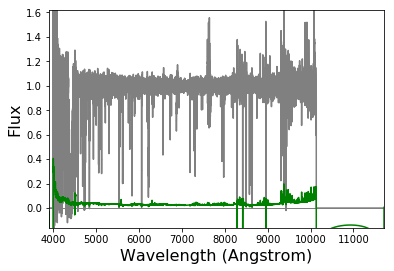

In [20]:
spec.normed = True  # Apply continuum to flux (and error)
spec.plot()

## Equivalent Width Measurement

In [21]:
lya = AbsLine(1215.6700*u.AA, z=0.)
lya.attrib['N'] = 10.**(13.6)/u.cm**2
lya.attrib['b'] = 30 * u.km/u.s

### Line

In [22]:
noise_sdict = dict(R=10000, sampling=3, SN=10)
noisy_spec = make_spec(lya, noise_sdict)

/home/xavier/local/Python/linetools/linetools/analysis/voigt.py:182: UserWarning: Using a sub-grid wavelength array because the input array is too coarse.
  warnings.warn('Using a sub-grid wavelength array because the input array is too coarse.')
/home/xavier/local/Python/linetools/linetools/analysis/voigt.py:183: UserWarning: Will return values rebinned to the input array.
  warnings.warn('Will return values rebinned to the input array.')


### Box car integration

In [23]:
dlamb = noisy_spec.wavelength - np.roll(noisy_spec.wavelength,1)
dlamb[0] = dlamb[1]  # First pixel needs a fix

In [24]:
EW = np.sum((1-noisy_spec.flux)*dlamb)
sigEW = np.sqrt(np.sum(noisy_spec.sig**2 * dlamb**2))
print('EW = {:g}, sigEW={:g}'.format(EW,sigEW))

EW = 2.78461 Angstrom, sigEW=0.0403192 Angstrom


#### linetools

In [25]:
lya.analy['spec'] = noisy_spec
lya.limits.set([1215.2,1216.2]*u.AA)
lya.measure_ew()

In [26]:
print('EW = {:g}, sigEW={:g}'.format(lya.attrib['EW'], lya.attrib['sig_EW']))

EW = 0.183566 Angstrom, sigEW=0.0202612 Angstrom


### Gaussian

In [27]:
lya.measure_ew(flg=2) 

In [28]:
print('EW = {:g}, sigEW={:g}'.format(lya.attrib['EW'], lya.attrib['sig_EW']))

EW = 0.180672 Angstrom, sigEW=0.0156591 Angstrom


## Equivalent Width Limit and S/N

### SDSS

$R = 2000$

Sampling of 2 pixels per FWHM

Assume S/N = 10 per pixel

In [29]:
# Unresolved line
R = 2000
sampling = 2
SN=10
#
FWHM = const.c.to('km/s') / R
print(FWHM)  # Broader than the widest Lya lines detected

149.896229 km / s


In [30]:
wave = 5000*u.AA  
dwave = wave / R / sampling
sigEW = np.sqrt(sampling) * dwave / SN
print(sigEW)

0.1767766952966369 Angstrom


In [31]:
# Limiting EW
EWlim = 3 * sigEW
print(EWlim)

0.5303300858899107 Angstrom


### Echelle
    R = 30,000
    3 pixel sampling
    
#### Wish to reach a $3\sigma$ sensitivity of 30mA at 5000A

In [32]:
R = 30000
wave = 5000 * u.AA
sampling = 3
dwave = wave / R / sampling
Wlim = 30 * u.AA / 1e3

In [33]:
SN = 3 * np.sqrt(sampling) * dwave / Wlim
SN

<Quantity 9.622504486493762>

----

## Line-Profile Fitting

In [34]:
noise_sdict = dict(R=10000, sampling=3, SN=10)
noisy_spec = make_spec(lya, noise_sdict)

/home/xavier/local/Python/linetools/linetools/analysis/voigt.py:182: UserWarning: Using a sub-grid wavelength array because the input array is too coarse.
  warnings.warn('Using a sub-grid wavelength array because the input array is too coarse.')
/home/xavier/local/Python/linetools/linetools/analysis/voigt.py:183: UserWarning: Will return values rebinned to the input array.
  warnings.warn('Will return values rebinned to the input array.')


### Simple least-squares fit using astropy.modeling

In [35]:
from astropy.modeling import fitting

### Voigt Model

In [36]:
Nguess = 13
bguess = 20*u.km/u.s
zguess = 0.
fitvoigt = ltav.single_voigt_model(logN=Nguess,b=bguess.value,
                        z=zguess, wrest=lya.wrest.value,
                        gamma=lya.data['gamma'].value, 
                        f=lya.data['f'], fwhm=noise_sdict['sampling'])
# Restrict parameter space
fitvoigt.logN.min = 10.
fitvoigt.b.min = 1.

### Fit

In [37]:
fitter = fitting.LevMarLSQFitter()
parm = fitter(fitvoigt,noisy_spec.wavelength,noisy_spec.flux.value)

### Results

In [38]:
print('logN = {:g}'.format(parm.logN.value))
print('b = {:g}'.format(parm.b.value))
print('z = {:g}'.format(parm.z.value))

logN = 13.6912
b = 30.233
z = 5.98475e-06


In [39]:
model_wave = np.linspace(1215.,1216.3,10000)
model_flux = parm(model_wave)

### Plot

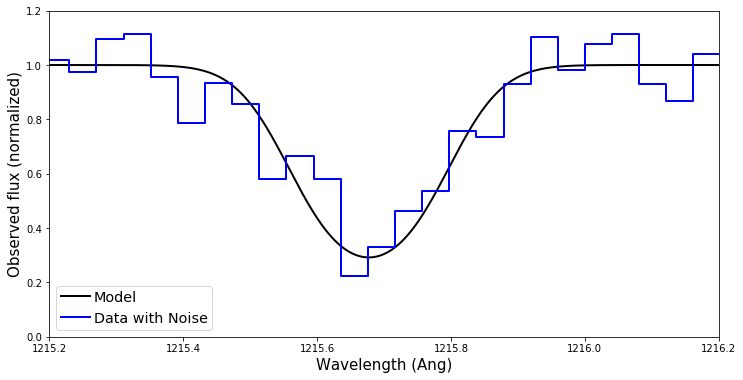

In [40]:
# Matplotlib plot
plt.figure(figsize=(12.0, 6.0))
plt.clf()
ax = plt.gca()
# Lines
lw=2
ax.plot(model_wave, model_flux, 'k', label='Model', linewidth=lw)
ax.plot(noisy_spec.wavelength, noisy_spec.flux, 'b', label='Data with Noise', drawstyle='steps-mid',
       linewidth=lw)

# Axes
ax.set_xlabel("Wavelength (Ang)",fontsize=15)
ax.set_ylabel("Observed flux (normalized)",fontsize=15)
ax.set_xlim(1215.2, 1216.2)
ax.set_ylim(0.,1.2)

# Legend
legend = plt.legend(loc='lower left', scatterpoints=1, borderpad=0.3, 
        handletextpad=0.3, fontsize='x-large', numpoints=1)
plt.show()